# Capstone Project - The battle of Neighborhoods

## 1) INTRODUCTION

 Uberlândia is a city located in the State of Minas Gerais, Brazil. It is the second largest city after state capital Belo Horizonte, with a population of 700.000 habitants. Uberlândia is an important logistic hub center between São Paulo and Brazil's capital, Brasília. Recently, the city has been classified by the International Congress and Convention Association (ICCA) as one of the brazilian cities that most host international events, staying in 9th position. <br><br>With a diverse gastronomy, international tourists seek in Uberlândia good places to eat brazilian food. The goal of this project is the following: <br><br>1- Locate good restaurants for the tourists to enjoy Uberlândia food.<br><br>2- Find neighborhoods that lack restaurants.<br><br>3- Find potential neighborhoods to open a restaurant dedicated to international tourists.

![Image of udi](https://aguaxterra.com.br/wp-content/uploads/2020/01/Uberl%C3%A2ndia.jpg)

## 2) DATA DESCRIPTION

Our data consists of a table containing Uberlândia restaurants with their location, likes, ratings, and names. This data was gathered using Foursquare API. Due to the API calls restriction, I've already saved the data in my personal folder. This data will also be available in my github account.

## 3) METHODOLOGY

For our analysis, we'll load Uberlandia restaurants from a table created with Foursquare API. After that, we'll employ folium library to plot Uberlandia map with restaurant locations. Then, based on visual inspection, we'll select places lacking restaurants as well as potential neighborhoods to open restaurants for tourists. For restaurants recommendation, we'll plot the top ten restaurants based on their rating.

Let's start by loading our python modules:

In [14]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim 
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium # map rendering library
import wikipedia as wp
import pgeocode
import geopandas as gpd
import  matplotlib.pyplot as plt

Let's import our data to a dataframe called "udi" (shortname for uberlândia)

In [8]:
udi = pd.read_csv('udi_restaurants.csv')
udi

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Venue Id,Venue Category,Name,Likes,Rating,Tips
0,Lídice,-18.924568,-48.275133,-18.920301,-48.275595,4cea7d8f948f224b57bdfb5d,Italian Restaurant,Talhareto Cozinha Italiana,10,7.8,4
1,Lídice,-18.924568,-48.275133,-18.922842,-48.279211,51b35470498e23845ff0663c,Middle Eastern Restaurant,Kebabji Express,29,7.5,9
2,Lídice,-18.924568,-48.275133,-18.920671,-48.274575,4e0f5b85483bc2b5f48b092b,Restaurant,Macadamia Restaurante,8,7.4,9
3,Lídice,-18.924568,-48.275133,-18.920484,-48.275485,4dfcde15b0fb84d7ace1a9bc,Seafood Restaurant,Kabana do Peixe,10,7.3,7
4,Lídice,-18.924568,-48.275133,-18.922532,-48.278934,59e80c7b872f7d28f03e6f18,Fast Food Restaurant,Burger King,6,7.3,0
5,Lídice,-18.924568,-48.275133,-18.921402,-48.278179,4c2620fbf1272d7f93ec85c5,Fast Food Restaurant,McDonald's,222,7.3,33
6,Lídice,-18.924568,-48.275133,-18.928332,-48.276450,4c8c2faad5049c7465e5466a,Brazilian Restaurant,Liro Chef,60,7.0,30
7,Lídice,-18.924568,-48.275133,-18.921854,-48.278244,563242d1498ea8b150d8dff6,Restaurant,Batata Baroa,7,7.0,0
8,Cazeca,-18.914683,-48.265700,-18.916098,-48.264148,4c55a6f84623be9ae033d5f4,Restaurant,Cantina Bom-peixe,14,8.0,6
9,Cazeca,-18.914683,-48.265700,-18.915416,-48.262315,50f0bcb4e4b0e0c9cecd4e61,Restaurant,Purê Point,217,8.8,68


Let's visualize Uberlândia restaurant neighborhoods!

In [6]:
latitude = udi['Neighborhood Latitude'].iloc[0]
longitude= udi['Neighborhood Longitude'].iloc[0]

map_udi = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(udi['Neighborhood Latitude'], udi['Neighborhood Longitude'], udi['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_udi)  
    
map_udi

We can see that the majority of the restaurants neighborhoods listed in Foursquare are located downtown. In this case, there is a lack of restaurants outside this region, which could be a potential place for opening new restaurants.

Now, let's visualize Uberlândia restaurants on the map.

In [32]:
latitude = udi['Venue Latitude'].iloc[0]
longitude= udi['Venue Longitude'].iloc[0]

map_udi_rest = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(udi['Venue Latitude'], udi['Venue Longitude'], udi['Name']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_udi_rest)  
    
map_udi_rest

What are the top ten restaurants? Let's use the "Rating" column to find out.

In [16]:
top_ten = udi.sort_values('Rating', ascending=False).head(10)
top_ten

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Venue Id,Venue Category,Name,Likes,Rating,Tips
26,Fundinho,-18.923440,-48.282926,-18.919766,-48.281662,4bf2f45398ac0f47b15562a8,Fast Food Restaurant,Xmais - Restaurante Fast Food de comida saudável,41,8.9,21
9,Cazeca,-18.914683,-48.265700,-18.915416,-48.262315,50f0bcb4e4b0e0c9cecd4e61,Restaurant,Purê Point,217,8.8,68
34,Tabajaras,-18.926933,-48.289255,-18.924915,-48.290987,4bb3afdd2397b713bc7a38b3,Brazilian Restaurant,Liro Chef Restaurante,236,8.7,95
19,Fundinho,-18.923440,-48.282926,-18.924519,-48.281310,541cb7b0498e537b4054187e,Mineiro Restaurant,Alfaiataria,55,8.5,12
24,Fundinho,-18.923440,-48.282926,-18.920847,-48.281236,4bb3ad0b2397b713d07638b3,Middle Eastern Restaurant,Restaurante Sahtten,157,8.5,68
18,Fundinho,-18.923440,-48.282926,-18.923738,-48.284706,4d594d5656f2b60ca99d772f,Brazilian Restaurant,Casarão Grill Restaurante,151,8.5,51
39,Martins,-18.909576,-48.281718,-18.906836,-48.278679,4cc0b395668db60c032b0fb4,Fast Food Restaurant,Silvanio Lanches,51,8.2,33
35,Tabajaras,-18.926933,-48.289255,-18.924099,-48.288580,4bd4bc686798ef3b454c628d,Fast Food Restaurant,Serginho Lanches,78,8.2,30
20,Fundinho,-18.923440,-48.282926,-18.923634,-48.282185,54ab1318498eeb0561e0ea02,Japanese Restaurant,koichi Culinária Japonesa,41,8.2,17
63,Santa Mônica,-18.918288,-48.243888,-18.916429,-48.243413,50c51c35e4b09f38ade2bf31,Italian Restaurant,Macarrão Mineiro,13,8.1,7


From top ten restaurants, two don't serve brazilian food (even though the last restaurant is categorized as Italian Restaurant, it serves Brazilian pasta) . However we'll leave them anyway for analysis (maybe some tourists would enjoy eating their home country food). Moreover, from top ten data we can visualize the preference of uberlandenses (people  from Uberlândia) for brazilian fast food.<br><br>

Let's make a bar plot showing the top ten rating:

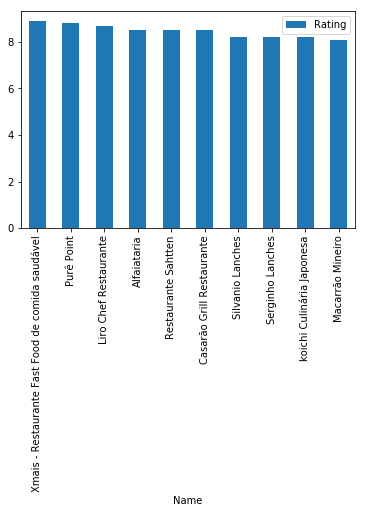

In [20]:

ax = top_ten.plot.bar(x='Name', y='Rating', rot=90)

We can observe that these restaurants are all above rating 8, __so we can recommend them to the tourists!__

In Uberlândia, most of the international events happen at two locations: Center Convention and Parque do Sabia. Let's plot their location (__red circles__) along with the restaurants to find out what are the nearby restaurants at each event location.

In [35]:
center_sabia_lat = [-18.909760, -18.910911]
center_sabia_lon = [-48.261436, -48.236139]
names = ['Convention', 'Sabia']
locs = zip(center_sabia_lat, center_sabia_lon, names)

for lat, lng, neighborhood in locs :
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_udi_rest)  
    
map_udi_rest

Looking the map we can definitely see that only four restaurants are __nearby Parque do Sabia__. In this case, the neighborhoods around this place represents a __good option__ for opening new restaurants for international tourists. As for the Center Convention, there are already tons of restaurants that might serve our tourists.

## 4) Conclusions 

Our analysis in this notebook leads to the following conclusions:

__1. Good restaurants for tourists:__ We've selected the top ten restaurants for the tourists to enjoy some of Uberlândia food based on rating. The top ten have a rating above 8, which makes them well evaluated.<br>
__2. Find neighborhood that lack restaurants:__ From the data plotted on the maps, we conclude that the majority of restaurants are found in downtown, hence other neighborhoods might benefit from opening a new restaurant.<br>
__3. Find neighborhoods to open new restaurants for international tourists:__ We plotted on the map the main location of international events. It was found that we don't have too many restaurants nearby Parque do Sabia, making this region suitable to open a restaurant for tourists.

__I hope you guys have enjoyed this analysis. Thanks!__